In [1]:
import networkx as nx
from statsmodels.distributions.empirical_distribution import ECDF
import scipy.stats
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import pandas as pd

In [2]:
def draw_network_colored(g, p, centrality):
    plt.figure(figsize = (13,7))
    nx.draw_networkx(g,
                     pos=p,

                     font_size = 12,
                     font_weight = 'bold',
                     font_color = 'plum',
                     edge_color = 'grey'
                    )

    nodes = nx.draw_networkx_nodes(g, p,cmap=plt.get_cmap('Blues') ,node_color=[c for c in centrality.values()],
                     node_size = 600,
                     )
    nodes.set_edgecolor('lightgrey')
    plt.axis('off')
    plt.show()

In [3]:
g = nx.Graph()
g.add_edges_from([(1,2),
                 (1,3),
                 #(1,4),
                 (1,5),
                 (1,6),
                 (2,5),
                 (5,4),
                 (3,5),

                 (3,4),
                 (3,7),
                 (2,6),
                 (4,7),
                 (5,6),
                 (5,7),
                 (6,7),
                 (6,8),
                  #(6,11),(6,12),
                 (7,8),
                  (8,9),(10,9),(10,11),(10,12),(10,13),(10,14),(10,15)
                 ])




Graph with 15 nodes and 23 edges


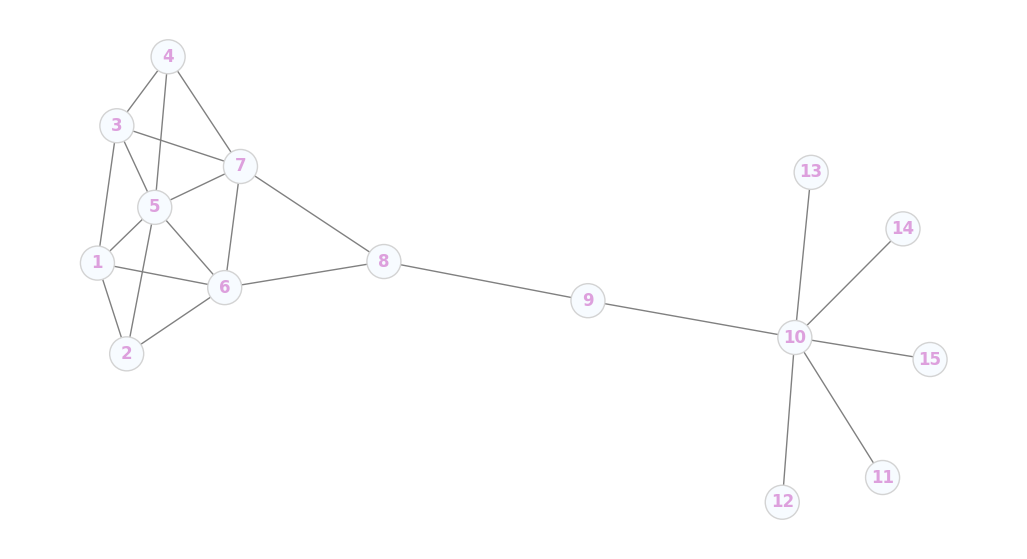

In [5]:
print(g)
posizione = nx.spring_layout(g)


draw_network_colored(g, posizione, {i:0 for i in g.nodes()})

In [16]:
# Degree Centrality

degree_centrality = nx.degree_centrality(g) # Already normalized
node_d_centr = list(degree_centrality.items())
node_d_centr.sort(key = lambda x: x[1], reverse = True)
node_d_centr[:5]

[(5, 0.42857142857142855),
 (10, 0.42857142857142855),
 (6, 0.3571428571428571),
 (7, 0.3571428571428571),
 (1, 0.2857142857142857)]

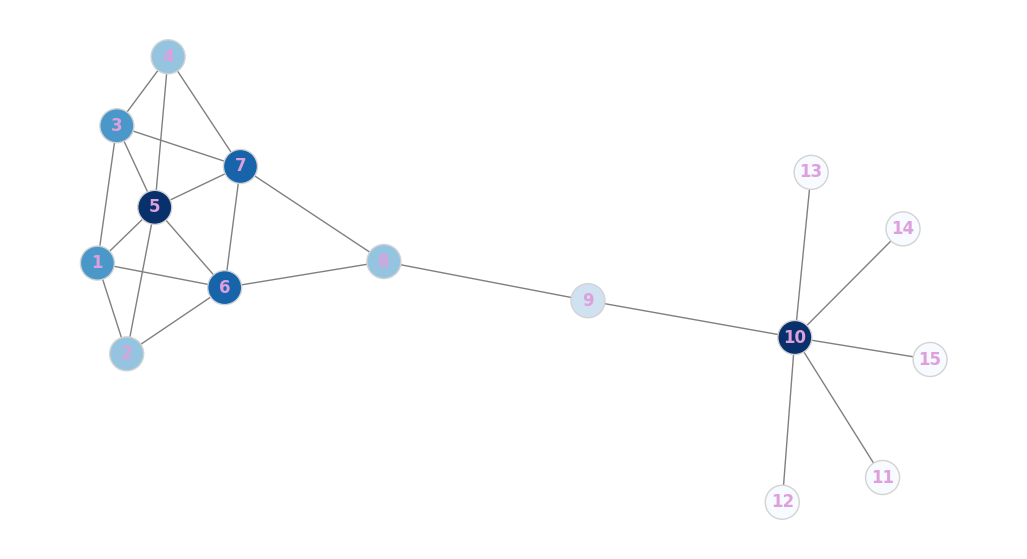

In [17]:
draw_network_colored(g, posizione, degree_centrality) #Color intensity is based on centrality values

In [18]:
# Closeness Centrality

closeness_centrality = nx.closeness_centrality(g)
node_c_centr = list(closeness_centrality.items())
node_c_centr.sort(key = lambda x: x[1], reverse = True)
node_c_centr[:5] # Top nodes based on Closeness Centrality

[(8, 0.4666666666666667),
 (9, 0.45161290322580644),
 (6, 0.4117647058823529),
 (7, 0.4117647058823529),
 (10, 0.4117647058823529)]

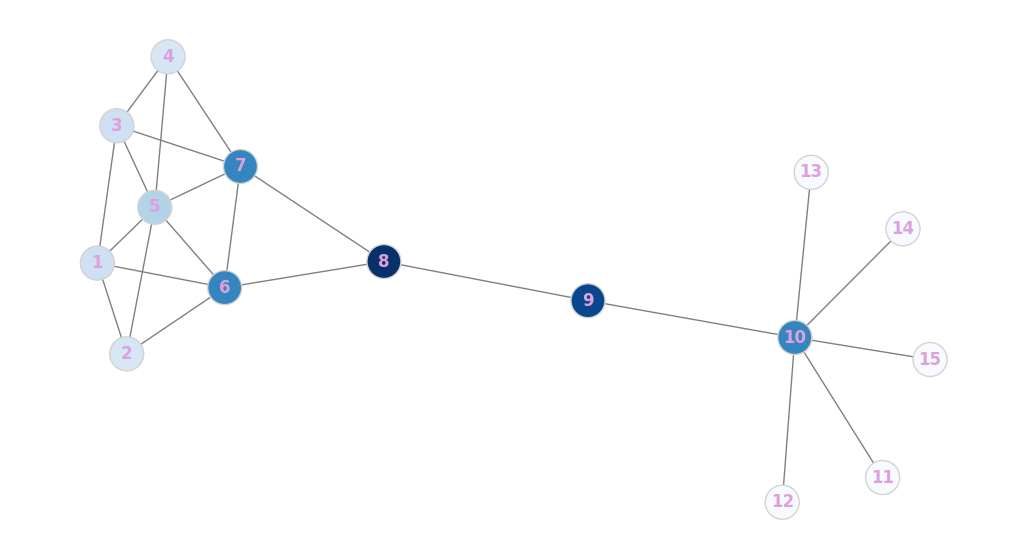

In [20]:
draw_network_colored(g, posizione, closeness_centrality)

# I nodi 6,7 e 10 sono i nodi che soffrono del fenomeno "Big in Japan" (sono famosi, ma solo dalla loro parte del grafo)

In [21]:
# Betweenness Centrality

betweenness_centrality=nx.betweenness_centrality(g)
node_b_centr = list(betweenness_centrality.items())
node_b_centr.sort(key = lambda x: x[1], reverse = True)
node_b_centr[:5]

[(10, 0.6043956043956045),
 (8, 0.5384615384615385),
 (9, 0.5274725274725275),
 (6, 0.22893772893772898),
 (7, 0.22893772893772898)]

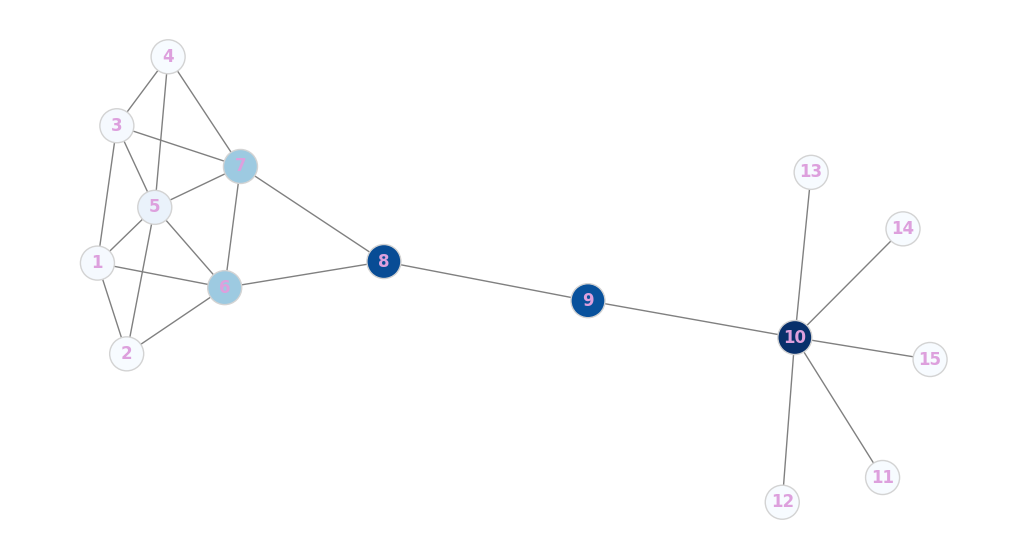

In [22]:
draw_network_colored(g, posizione, betweenness_centrality)

